<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">k-Means Clustering</h2>

&nbsp;

### Overview

Clustering is one of the most common uses of unsupervised machine learning in practical applications. These types of models are concerned with identifying patterns in data by grouping similar points into *clusters*. k-Means clustering is a simple method that can perform clustering analysis very quickly, but requires knowledge of the number of clusters *k* to use. There are many implementations of this algorithm which attempt to improve the method further, such as k-Means++ in the SciKit Learn library. This notebook introduces k-means clustering by building a Python implementation from scratch, including the k-means++ optimisation method. Related concepts such as Voronoi diagrams are covered visually. Methods for intelligently selecting *k* are also presented using inertia and elbow diagrams.


### Contents

Section 1 - Introduction to Clustering Problems

Section 2 - The k-Means Clustering Method

Section 3 - Voronoi and Elbow Diagrams

Section 4 - SciKit Learn Implementation

Section 5 - Conclusion

Section 6 - Glossary

Section 7 - Further Reading

<h2 align="center">Section 1 - Introduction to Clustering Problems</h2>

### 1.1 - Overview of Clustering

**Clustering Analysis** was first introduced in 1932 by Anthropologists, Driver and Kroebe, and was popularised by psychologist Raymond Cattell in 1943. These studies were attempting to group data, be that of animals or personalities, into similar categories. Nowadays, clustering algorithms are commonly used for applications such as social network analysis (e.g. predicting user's friend groups), market segmentation (e.g. grouping similar customers), recommender systems (e.g. for products on Amazon), and many more.

There are many types of clustering methods that can be used. These differ in the way that they find patterns in data. The main categories include:
* Centroid models
* Density models
* Distribution models
* Hierarchical models

k-Means clustering is a type of Centroid model.

&nbsp;

### 1.2 - Centroid-Based Clustering Models

Centroid models produce **clusters** by calculating the coordinates for the center of groups of similar points, these center points are called **centroids**. The number of centroids, $k$, is chosen by the user, and should match the number of clusters in the data. For example, a dataset with 3 clusters should have 3 centroids. Sometimes it is easy to see what the best value of $k$ should be, but for some data it is not so clear. In addition, it may be useful for a computer to determine the value for $k$ automatically. This can be achieved using an elbow diagram, and is discussed later in this notebook.

&nbsp;

### 1.3 - Clustering as an Optimisation Problem

Clustering algorithms attempt to group data points based on their similarity, and so it is useful to define a metric which quantifies the dissimilarity between data points within clusters. This forms an optimisation problem, where the goal is to minimise the dissimilarity. This metric is more formally known as an **objective function**, since the dissimilarity is a function of the cluster assigned to each data point. By assigning the clusters in an optimal way, the dissimilarity can be minimised, which is the objective of clustering algorithms.

The most commonly used objective function for centroid clustering is called the **inertia**, or **within-cluster-sum-of-squares**. This is given by the sum of the squared distance between each data point and its centroid. Mathematically, this can be represented as [1]:

&nbsp;

$\begin{align}
\text{inertia}(c_1, c_2, ..., c_k) = \sum_{j=1}^{k} \sum_{i=1}^{N} \lVert{x_{i}^{j}-c_j}\rVert^2
\end{align}$

&nbsp;

where $k$ is the number of centroids, $N$ is the number of data points, $x$ is an individual data point and $c$ is its centroid. For more on viewing clustering as an optimisation problem, see the MIT lecture on clustering delivered by John Guttag [2].

&nbsp;

### 1.4 - Intuition for the Inertia Formula

The inertia finds the sum of the squared distance between each point and the centroid in each cluster, which is given by the right-most portion of the formula. This is called the **variability** of the cluster, and is a similar measure to variance. 

&nbsp;

$\begin{align}
\text{variability}(c) = \sum_{i=1}^{N} \lVert{x_{i}-c}\rVert^2
\end{align}$

&nbsp;

The key distinction between variability and variance, is that the variability is not normalised by dividing by the number of data points within the cluster (i.e. to obtain the variance in a cluster, divide the variability by the number of points in the cluster). Normalising the variability would mean that the penalty for producing a large cluster with high variance would be comparable to that of a small cluster with high variance. Thus by avoiding normalisation, the model will penalise large, highly-diverse clusters. In-turn this will encourage larger clusters to be broken up into smaller clusters. The inertia is the sum of the variability for each cluster, hence introducing the second summation term in the inertia equation. 

&nbsp;

### 1.5 - Optimisation Constraints

Simply minimising the inertia without constraints would lead to a trivial solution of assigning each point to its own cluster. This would produce variability values of 0 for each cluster, which would sum to an inertia of 0. There are 2 feasible restrictions that can be enforced to prevent this behaviour:

* clusters can be required to have a minimum distance between them
* a set number of clusters can be chosen

k-Means clustering opts for the second restriction, by attempting to minimise the objective function under the constraint of using $k$ centroids.

&nbsp;


### 1.6 - Minkowski Distances

The norm notation in the inertia equation is used to denote the distance between each point and its centroid. This distance can be calculated in several different ways, which are generalised by the **Minkowski distance** of order $p$. The Minkowski distance is a general formula for calculating the distance between two points in $n$-dimensional space, $a$ and $b$, and is given by:

&nbsp;

$\begin{align}
a = (a_1, a_2, ..., a_n)
\end{align}$

$\begin{align}
b = (b_1, b_2, ..., b_n)
\end{align}$

&nbsp;

$\begin{align}
\text{d(a,b)} = \Bigg( \sum_{i=1}^{n} \lvert ai - b_i \rvert ^p \Bigg)^{1/p}
\end{align}$

&nbsp;

Distance metrics are written in short-hand using $L$ followed by a subscript for the order of the metric, $p$. The general notation of a Minkowski distance metric therefore is $L_p$.

&nbsp;

### 1.7 - Manhattan Distance, $p=1$

This Minkowski generalisation can be applied with various values of $p$ to give different measures for distance. The Minkowski distance of order 1, $L_1$, is a common distance metric known as the **Manhattan distance**. This metric defines distances as the sum of the difference between two points in each dimension:

&nbsp;

$\begin{align}
\text{d(a,b)} = L_1 = \sum_{i=1}^{n} \lvert a_i - b_i \rvert = \lvert a_1-b_1 \rvert + \lvert a_2-b_2 \rvert +...+ \rvert a_n-b_n \rvert
\end{align}$

&nbsp;

In two dimensions, this is the sum of the difference in the $x$ coordinates and the difference in the $y$ coordinates. The name *Manhattan* distance comes from the similarity of navigating the streets of Manhattan. The road layout forms a grid, and so the fastest way to get between two locations is to travel horizontally then vertically, as opposed to diagonally (because there are buildings obstructing this path). Note that the absolute value is taken for each difference in the sum, this is so that *negative distances* do not cancel out *positive distances*. Of course, negative distances do not make sense in this context, moving up instead of down or left instead of right is not relevent to counting the distance travelled, so the absolute value is taken to obtain the absolute difference between the points.

&nbsp;

### 1.8 - Euclidean Distance, $p=2$

The most common distance metric is the **Euclidean distance**, which is a Minkowski distance of order 2 denoted $L_2$. This metric finds the shortest straight line path between two points, which is often a diagonal line. This is the distance most people think of when finding the distance between two points, and is given by the square root of the sum of the squared differences between two points in each dimension:

&nbsp;

$\begin{align}
\text{d(a,b)} = L_2 = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2} = \sqrt{(a_1-b_1)^2+(a_2-b_2)^2+...+(a_n-b_n)^2}
\end{align}$

&nbsp;

### 1.9 - Chebyshev Distance, $p=\infty$

Finally, another distance metric used is the **Chebyshev distance**, where $p=\infty$ (written as $L_\infty$). Mathematically, this is given by the equation below, but simplifies to selecting the largest difference between dimensions for two points. For example, the points (2,10) and (4,15) have a difference of 2 in the $x$ dimension, and 5 in the $y$ dimension. The largest difference here is 5, and so the Chebyshev distance between these points is 5. The formula is given by:

&nbsp;

$\begin{align}
\text{d(a,b)} = L_{\infty} = max(\lvert a_1-b_1 \rvert , \lvert a_2-b_2 \rvert , ... , \rvert a_n-b_n \rvert)
\end{align}$

&nbsp;

### 1.10 - Visualising Minkowski Distance Metrics

The most commonly used distance metrics introduced above can be visualised quite easily on a two-dimensional graph. Other  metrics such as $p=3$ and $p=4$ are less easily visualised, however these are much less commonly used.

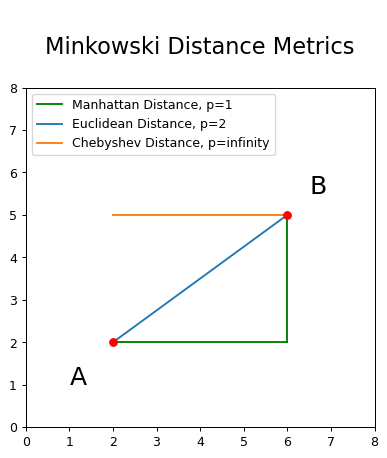

In [55]:
# Create figure
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('\nMinkowski Distance Metrics\n', fontsize=18)
ax.set_xlim(0,8)
ax.set_ylim(0,8)

# Point A
ax.scatter(2, 2, c='red')
ax.annotate(text='A', xy=(1,1), fontsize=20)

# Point B
ax.scatter(6, 5, c='red')
ax.annotate(text='B', xy=(6.5,5.5), fontsize=20)

# Manhattan distance (p = 1)
ax.plot([2,6],[2,2], zorder=0, c='green')
ax.plot([6,6],[2,5], zorder=0, c='green', label='Manhattan Distance, p=1')

# Euclidean distance (p = 2)
ax.plot([2,6],[2,5], zorder=0, label='Euclidean Distance, p=2')

# Chebyshev distance (p = infinity)
ax.plot([2,6],[5,5], zorder=0, label='Chebyshev Distance, p=infinity')

ax.legend(loc='upper left')

<h2 align="center">Section 2 - The k-Means Clustering Method</h2>

### 2.1 - Overview of k-Means Clustering

k-Means clustering attempts to group similar data points into $k$ clusters of equal variance. This is achieved by minimising the objective function, called the inertia. Like many machine-learning methods, there are a set of parameters which the algorithm learns from data, and some hyperparameters which are set by the programmer. The parameters in this case are the centroid locations, which are iteratively moved closer to optimal locations in the center of clusters. The hyperparameter is the value for $k$, which defines the number of centroid positions to optimise. k-Means clustering is said to be a **hard clustering** algorithm (as opposed to a **soft clustering** algorithm). This is because points are classified as belonging to single clusters. In soft clustering, a point can belong to more than one cluster, and by different amounts. See the notebook *Gaussian Mixture Models* for more on soft clustering.

&nbsp;

### 2.2 - k-Means Clustering Algorithm

The k-means method follows a simple set of steps that are repeated to optimise the location of the centroids. The algorithm itself is **non-deterministic**, meaning that each time it is ran the results may be different. This is because the starting positions of the centroids is randomly initialised, then iteratively improved. The algorithm is also **greedy**, in that the locally optimum solution is pursued at every step until the stopping criteria are reached, rather than allowing alternative solutions to be explored. The steps for k-means are as follows:

* Step 1) Initialise $k$ random centroids
* Step 2) Assign each point to its closest cluster using the Euclidean distance metric
* Step 3) Calculate the new centroid positions by finding the average coordinates of each point in the cluster
* Step 4) Repeat steps 2 and 3 until the stopping criteria are reached


The time complexity for $i$ iterations, $k$ centroids, and $n$ points in $d$ dimensional space is $O(i \times k \times n \times d)$. In each iteration, every point is compared to every centroid to find the closest cluster. This gives $k$ centroids multiplied by each the comparison for $n$ points, requiring $d$ calculations per comparison. Typically $d << n$ so each iteration is relatively fast. Depending on the position of the initial centroids, convergence generally occurs within a small number of iterations. Overall, the speed of k-means is much greater than other clustering algorithms such as Hierarchical clustering (which has a time complexity of O($n^3$)).

&nbsp;

### 2.3 - Stopping Conditions

The algorithm will terminate after reaching a pre-defined **stopping condition**. There are 3 typical stopping conditions that can be implemented with a k-means clustering algorithm, including [3]:

* centroid coordinates do not change
* points remain in the same cluster
* a maximum number of iterations is reached

The final 2 conditions are utilised in this implementation. If the centroid coordinates do not change, or all the points remain in the same cluster for 2 iterations in a row, this is indicative of convergence. After the second iteration with the same points in each cluster, the centroids will lie at the mean position of all their respective points, and so further iteration will not yield any different results. These two stopping conditions are essentially checking the same criterion, with little difference between them. The final possibility utilises a maximum iteration count. This is a useful fail-safe to prevent extensive computation when a certain number of iterations are expected. This value should be chosen carefully however, since low values can cause premature termination and sub-optimal results. In practice, it is best to set this parameter to a value higher than the number of iterations the algorithm is expected to take.

&nbsp;


### 2.4 - Using the Euclidean Distance Metric

k-Means clustering always uses the Euclidean distance metric, $L_2$. This is because the sum of the squared Euclidean distances give a variability which is akin to variance. This is an important point to note, since the goal of the the k-means method is to minimise the variance within each cluster.

It is possible to perform clustering with other distance metrics, such as the Manhattan distance. The result however is not a k-means algorithm, but rather k-Medians. This is because the $L_1$ metric returns the median for each cluster, giving *medoids*. This form of clustering is less commonly used compared to the k-means methods.

&nbsp;

### 2.5 - Limitations of k-Means Clustering:

As discussed above, there are a few limitations of k-means when compared to other methods, including its non-deterministic and greedy nature. Aside from these, there are a few other limitations which are worth being discussed.

&nbsp;

**Poor Initial Centroids**

The random nature of assigning the initial centroid locations means that sometimes the clusters are located very near to each other. This can cause the required number of iterations to increase significantly. Additionally, some initial placements will cause the clusters to converge to local optima. It is important to note that convergence to global optima is not guaranteed. As a general principle, greedy non-deterministic algorithms are ran multiple times and the best solution is taken forward. This solution is also appropriate for k-means clustering to improve performance. Another option is to impose constraints on the positions of the initial cluster such as a minimum distance between centroids according to the k-Means++ improvement (which is the choice opted for later in this implementation).

Solutions:
* Use the k-Means++ improvement to impose good initial centroid positions.
* Run the model multiple times and select the best results.

&nbsp;

**Empty Clusters**

It is possible for the randomly initialisation to position a centroid such that it will never be the closest centroid to any data point in the feature space. When this happens, the model has created an empty cluster. Programmatically, this can present a challenge in that the new position of the centroid cannot be calculated as the mean of the points within that cluster. When this happens the best course of action is to allow the previous location to persist. It is possible in some cases that the other centroids will move around the empty cluster, allowing some points to be associated with it, but this is not always the case. The best solution in this case is to constrain the positions of the initial centroids using the k-Means++ improvement.

Solutions:
* Use the k-Means++ improvement to impose good initial centroid positions.
* Run the model multiple times and select the best results.
* Assign the empty cluster its previous centroid location when updating centroids.

&nbsp;

**Non-Optimal Choice of $k$**

$k$ is usually chosen using **a priori** knowledge about the problem, that is knowledge obtained by applying reasoning to a problem, as opposed to using knowledge based on experience. Sometimes this is the best option, especially in cases where the data can be easily visualised in the exploratory data analysis stage. However for some problems it is not clear what the best choice for $k$ may be. Additionally, there may be time where a number of clusters seems appropriate, but it is not the optimal choice. For example, in a problem attempting to cluster people with an illness, it may seem appropriate to use $k=2$: 1 cluster for people who have the illness, and 1 cluster for people who do not. This may not be the optimal choice however, as the illness may present in multiple ways, forming several distinct clusters. Hence, the best choice for $k$ is not clear.

In these cases, it may be appropriate to run a slower clustering algorithm (such as Hierarchical clustering) on a small random subset of the data to get an approximate idea of the best value for $k$. Another option is to run the model multiple times using different values of $k$, then construct an elbow diagram. This is shown later in this notebook.

Solutions:
* Run the model multiple times to with different values of $k$ then construct an elbow diagram to determine the optimum value.
* Run a different clustering algorithm such as Hierarchical clustering on a small subset of the data to approximate a value for $k$ to investigate.

&nbsp;

**Inertia**

Inertia assumes that all clusters are **isotropic**, meaning the within-cluster variance is equal in all directions. This is not always the case, and so k-Means Clustering gives poor results when working with elongated clusters, or those with irregular shapes. Inertia is also not a bounded metric and so gives values between 0 and $\infty$, instead of 0 and 1, or -1 and 1 etc. In high dimensional spaces Euclidean distances grow increasingly large, which can present a problem in the inertia growing rapidly. One method to lower the inertia is to remove features of the data using a dimensionality reduction technique such as Principle Component Analysis (PCA). See the notebook *Principle Component Analysis* for more about dimensionality reduction. Another solution is to normalise the data to reduce the magnitiude of the variability values. A common technique for this is Z-scaling, which is covered in the notebook *Distributions in Data*.

Solutions:
* Use a dimensionality reduction technique to remove features from the data.
* Scale the data to reduce, for example using Z-scaling.

&nbsp;

**Sensitivity to Outliers**

Since centroid locations are based on the mean of points within clusters, outliers can have a significant effect for small datasets. In these situations it is preferable to collect more data. However if this is not possible, it may be best to use k-Median clustering which is resistant to outliers.

Solution:
* Collect more data if possible.

&nbsp;

### 2.6 - k-Means++ Improvement

The k-Means++ improvement imposes an additional constraint on the initial centroid locations, and was introduced by Arthur and Vassilvitskiiin in their 2006 paper *k-means++: The Advantages of Careful Seeding* [4]. This forces the centroids to be generated as far away as possible from each other, hence overcoming the issues of poor convergence and empty clusters as described earlier. This adds some additional complexity to the centroid initialisation step, as opposed to randomly positioning each centroid. However, this additional complexity is offset by the reduction in required iterations, as well as the benefits of ensuring good convergence. The method can be implemented in several way, the approach used in this notebook's implementation is outlined below:

* Step 1) Randomly initialise the first centroid within the bounds of the feature space.
* Step 2) Find the point in the training data with the greatest distance from the centroid.
* Step 3) For each further centroid, calculate the average distance between each point and every other centroid, then   select the point with the greatest average distance for the location of the next centroid.

&nbsp;

### 2.7 - Creating a Python Implementation of k-Means

Below is a Python implementation of k-means clustering, which should be initialised with a value of $k$. Once instantiated, an object of this class can be fit to data in the form of a list-like object (Python list, tuple, NumPy array) using the `fit` method. The data structure should consist of $n$ elements representing each data point, with each point itself being a list-like object with $d$ elements containing the coordinates (values of the features) of the point. After training data has been fit, the clusters of testing data (of the same form as the input data) can be predicted using the `predict` method. This returns a Python list of cluster labels. Note that k-means itself is purely a clustering algorithm, and so does not possess any prediction capabilities. This prediction method uses a k-nearest neighbors approach with $k=1$. For more on this specific algorithm see the notebook *k-Nearest Neighbors*. The object can be instantiated using the traditional centroid initialisation method of randomly assigning centroid across the feature space (this is the default behaviour). The performance can also be improved setting the `kmeanspp` parameter equal to `True` which enforces the intelligent selection of initial centroid locations according to the k-Means++ improvement.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import make_blobs

mpl.rcParams['figure.dpi']= 90

In [55]:
class KMeansClustering:

    ''' An implementation of k-means clustering with an optional k-Means++ improvement.

        Attributes:
            k (int):                      The number of centroids to use.
            max_iter (int, optional):     The maximum number of iterations allowed before
                                          terminating.
            kmeanspp (bool, optional):    Whether to apply the k-Means++ improvement.
            data (list-like):             Points in the feature space used to train the algorithm.
            initial_centroids (list):     The centroids generated before applying the algorithm.
            centroids (list):             The final centroid positions after optimisation.
            closest_centroids (list):     The closest centroids (referenced by the centroid index in
                                          the self.centroids list) for each point. A list of
                                          predictions.
            all_closest_centroids (list): An accumulative history of all closest_centroids lists,
                                          used to assess convergence (if the cluster associated with
                                          each cluster does not change, i.e. the two most recent
                                          closest_centroids lists are equal).
            inertia:                      The performance metric for k-means clustering, calculated
                                          by the sum of the squared distance between each point and
                                          its centroid.

    '''

    def __init__(self, k, max_iter=10, kmeanspp=False):
        self.k = k
        self.max_iter = max_iter
        self.kmeanspp = kmeanspp
        self.data = None
        self.initial_centroids = None
        self.centroids = None
        self.closest_centroids = None
        self.all_closest_centroids = [None]
        self.inertia = None

    def fit(self, data):
        ''' Fit the model to the training data.

            Randomly initialise the centroid positions for a set of training data and assign each
            point to its closest cluster. Iteratively re-calculate the centroid positions by taking
            the average coordinates of the points in each cluster, until the centroid locations do
            not change (indicating convergence) or the maximum number of iterations is reached. The
            solution may not always be optimal. This can be corrected by setting the optional
            argument space_centroids equal to True when instantiating the KMeansClustering object.
            Finally calculate the inertia of the solution and update the self.inertia attribute.

            Args:
                data (list-like): The training data, containing n list-like elements representing
                                  each training point, each with d elements representing features.

            Returns:
                None
        '''
        self.data = data
        self.initial_centroids = self.initialise_centroids()
        self.centroids = self.initial_centroids
        self.closest_centroids = self.find_closest_centroids(self.data)
        
        iter_num = 0
        while self.closest_centroids != self.all_closest_centroids[-1] and iter_num < self.max_iter:
            iter_num += 1
            self.centroids = self.calculate_centroids()
            self.closest_centroids = self.find_closest_centroids(self.data)
        
        self.inertia = self.calculate_inertia()
        print(f'Completed in {iter_num} iterations.')

    def predict(self, inputs):
        ''' Predict clusters for unseen data points.

            Take in list-like of data points and return a list containing the predicted cluster that
            each point belongs to. The predicted cluster is determined by calculating the distance
            between a point and each cluster and selecting the closest centroid.

            Args:
                inputs (list-like): The input data, containing n list-like elements representing
                                    each training point, each with d elements representing features.

            Returns:
                predictions (list): The predicted clusters for each point, reference by the centroid
                                    index in the self.centroids list.
        '''
        predictions = []
        for point in inputs:
            distances = []
            for centroid in self.centroids:
                distances.append(self.distance(point, centroid))
            closest_centroid = distances.index(min(distances))
            predictions.append(closest_centroid)
        return predictions

    def initialise_centroids(self):
        ''' Initialise k centroids in the feature space

            Return a (k x d) matrix containing centroid coordinates for self.data where self.k is
            the number of centroids, and d is the dimensionality of the data (number of elements per
            data point). For example, if self.data contains 2D points and 3 centroids are required, 
            return a (3 x 2) array , where each row gives the coordinates of a centroid. Coordinate
            values are bounded between the minimum and maximum of the data points (i.e. the
            centroids lie within the data). If self.kmeanspp is True, generate the clusters by
            assigning the first centroid randomly within the bound of the feature space. Then assign
            all subsequent centroids such that the average distance between each centroid and the
            existing centroids is maximised. If self.kmeanspp is False, generate all clusters
            randomly. This can cause empty clusters and poor convergence.

            Args:
                None

            Returns:
                centroids (list): The randomly initialised centroids, bounded between the minimum
                                  and maximum values in each dimension of the training data,
                                  self.data, in the feature space.
        '''
        dimensions = len(self.data[0])
        max_values = np.amax(self.data, axis=0)
        min_values = np.amin(self.data, axis=0)

        # k-Means++ Method
        if self.kmeanspp == True:
            centroids = []
            first_centroid = np.r_[[np.random.uniform(min_values[d], max_values[d]) 
                             for d in range(dimensions)]]
            centroids.append(first_centroid)

            # Find the furthest centroids from the first centroid
            for _ in range(self.k-1):
                next_centroid = None
                greatest_distance = 0

                # Calculate the average distance between each point and the existing centroids
                for point in self.data:
                    distances = [self.distance(point, c) for c in centroids]
                    average_distance = np.mean(distances)
                    if next_centroid is None or average_distance > greatest_distance:
                        next_centroid = point
                        greatest_distance = average_distance

                centroids.append(next_centroid)

            centroids = np.r_[centroids]

        # Traditional k-Means Method
        else:
            centroids = [np.random.uniform(min_values[d], max_values[d], self.k) 
                        for d in range(dimensions)]
            centroids = np.r_[centroids]
            centroids = np.transpose(centroids)

        return centroids
    
    def distance(self, point, centroid):
        '''
            Return the Euclidean distance between a point and a centroid.

            Args:
                point (list-like): A d dimensional vector of a point in the feature space
                centroid (list-like): A d dimensional vector of a centroid

            Returns:
                distance (float): The Euclidean distance between a point and a centroid in the
                                  feature space.
        '''
        dimensions = len(point)
        distance = np.sqrt(sum([(point[i] - centroid[i])**2 for i in range(dimensions)]))
        return distance
    
    def find_closest_centroids(self, data):
        '''
            Calculate the closest centroid for each point in some data.
            
            Calculate the Euclidean distance between each point in some data and each centroid, then
            assign the points a cluster based on the calculated shortest distance. Return a list of
            the closest centroid for each point. This function is used in both fitting training data
            and predicting input data.

            Args:
                data (list-like): The data containing n elements representing points, each with d
                                  features.

            Returns:
                closest_centroids (list): The cluster assigned to each point, referenced by the
                                          index of the centroid in self.centroids.
        '''
        self.all_closest_centroids.append(self.closest_centroids)
        closest_centroids = []
        for point in data:
            distances = []
            for centroid in self.centroids:
                distances.append(self.distance(point, centroid))
            closest_centroid = distances.index(min(distances))
            closest_centroids.append(closest_centroid)
        return closest_centroids
    
    def calculate_centroids(self):
        '''
            Calculate the centroid positions by taking an average of the points in each cluster.

            Calculate new coordinates of the centroids by taking the mean position of each points
            associated with each cluster. Return the values for the new centroids in a (k x d) list,
            where k is the number of centroids, d is the dimensionality of the data points. Each row
            in the list represents the coordinates of a single centroid.

            Args:
                None

            Returns:
                new_centroids (list): The location for each centroid, structured as a list
                                      containing a nested list for each centroid, each with d
                                      dimensions.
        '''
        new_centroids = []
        clusters = [np.r_[[self.data[i] for i in range(len(self.data)) 
                    if self.closest_centroids[i] == c]] for c in range(self.k)]
        for c, cluster in enumerate(clusters):
            try:
                x_mean = np.mean(cluster[:,0])
                y_mean = np.mean(cluster[:,1])
                new_centroids.append([x_mean, y_mean])
            # Handle empty clusters
            except IndexError:
                new_centroids.append(self.centroids[c])
        return new_centroids

    def calculate_inertia(self):
        '''
            Calculate the value of the objective function.

            Args:
                None

            Returns:
                inertia (float): The sum of the squared distance between each point and its assigned
                centroid.
        '''
        inertia = sum([self.distance(point, self.centroids[self.closest_centroids[i]])**2 for
                       i, point in enumerate(self.data)])
        return inertia   
    

### 2.8 - Create Data and Define a Plotting Function

Below defines a simple function to instantiate an object of the KMeansClustering class and plot the results of clustering some toy training data and testing data.

In [56]:
# Create data
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=9)
split = int(0.75*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [58]:
def plot(model, X_train, X_test):
    # Create figure
    colours = ['#ffdfba', '#baffc9', '#bae1ff'] # orange, green, blue
    fig, ax = plt.subplots(ncols=3, figsize=(15,5))
    ax[0].set_title('\nInitial Centroids\n', fontsize=18)
    ax[1].set_title('\nClustered Data\n', fontsize=18)
    ax[2].set_title('\nPredictions\n', fontsize=18)

    # Plot examples
    y_clustered = model.predict(X_train)
    for i, point in enumerate(X_train):
        ax[0].scatter(point[0], point[1], c='purple', alpha=0.5)
        ax[1].scatter(point[0], point[1], c=colours[y_clustered[i]])
        ax[2].scatter(point[0], point[1], c=colours[y_clustered[i]])

    # Plot centroids
    for i in range(len(model.centroids)):
        ax[0].scatter(model.initial_centroids[i][0], 
                    model.initial_centroids[i][1],
                    c='red',
                    marker='x',
                    s=100,
                    zorder=10)
        ax[1].scatter(model.centroids[i][0],
                    model.centroids[i][1],
                    c='red',
                    marker='x',
                    s=100,
                    zorder=100)
        ax[2].scatter(model.centroids[i][0],
                    model.centroids[i][1],
                    c='red',
                    marker='x',
                    s=100,
                    zorder=10)

    # Plot predictions
    y_pred = model.predict(X_test)
    for i, point in enumerate(X_test):
        ax[2].scatter(point[0], point[1], c=colours[y_pred[i]], marker='x', s=200)


### 2.9 - Successful Clustering Example using k-Means++

The plots below show a successful clustering example using the k-Means++ improvement. The first plot on the left shows the raw data (purple) with the 3 initial centroids. The first centroid generated does not lie on a point in the dataset, but is instead assigned a random value between the minimum and maximum $x$ and $y$ coordinates in the training data. The following 2 centroids do lie on points from the training data, and are spaced apart such that the distance between them is maximised. This prevents empty clusters forming, as well as poor convergence.

The middle image shows the clustered data after 2 iterations, at which point the clusters did not change and so the stopping condition was reached. This fast convergence highlights that the benefits k-Means++ offsets the up-front computational cost of using a more complex method for centroid initialisation.

The final image shows the clustering of test data (marked with X's) to the closest centroids. In this simple example, it is clear to see by eye that these clusters have been assigned correctly.

Completed in 2 iterations.


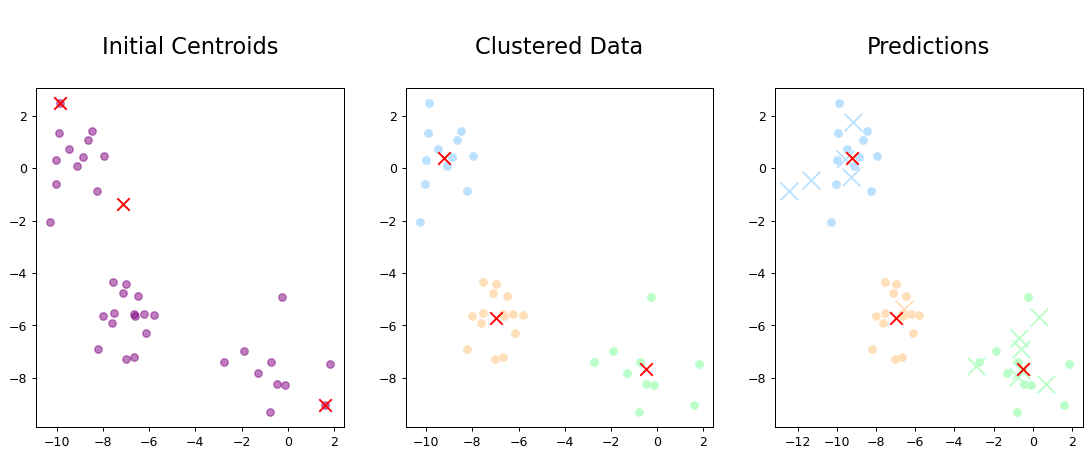

In [60]:
model = KMeansClustering(k=3, kmeanspp=True)
model.fit(X_train)
plot(model, X_train, X_test)

### 2.10 - Unsuccessful Clustering Examples without using k-Means++

The plots below show 2 unsuccessful clustering examples without using the k-Means++ improvement. These example also converged quickly with only 2 iterations necessary to see no further change in the clusters. This is not always the case, as iterations of 6 or higher have been observed using this implementation.

The first example shows a scenario where the random initialisation of clusters led to a large, highly-diverse cluster and two much smaller clusters. The second example shows a scenario where an empty cluster has been generated. This occurs when 2 centroids are initialised close to each other, but far from any points. These type of convergence are tackled directly by the k-Means++ improvement.

Completed in 2 iterations.


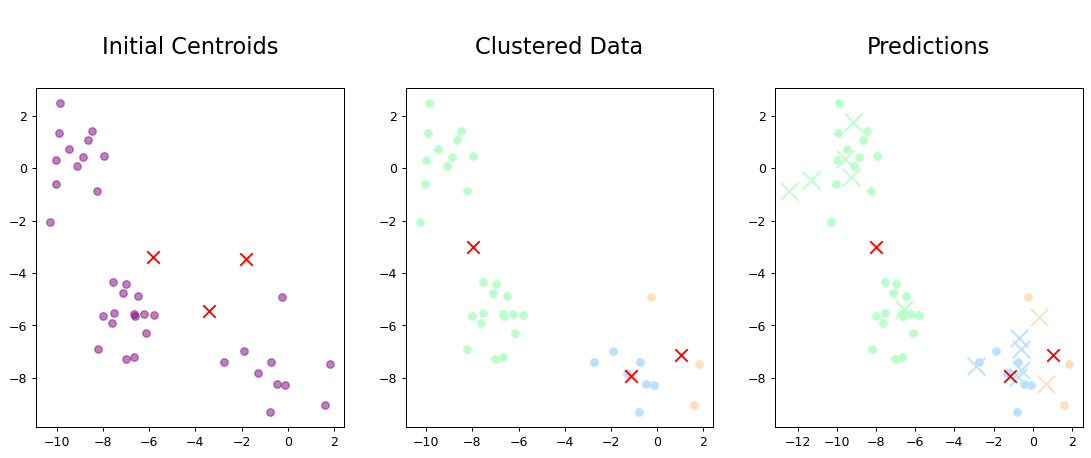

In [152]:
model = KMeansClustering(k=3, kmeanspp=False)
model.fit(X_train)
plot(model, X_train, X_test)

Completed in 2 iterations.


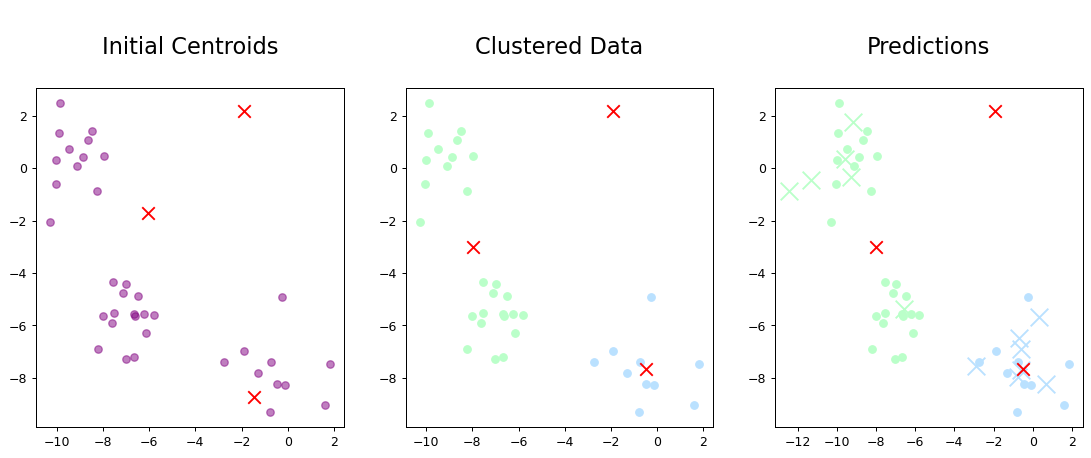

In [128]:
model = KMeansClustering(k=3, kmeanspp=False)
model.fit(X_train)
plot(model, X_train, X_test)

<h2 align="center">Section 3 - Voronoi and Elbow Diagrams</h2>

### 3.1 - Visualising the Partition of the Feature Space with Voronoi Diagrams

All clustering algorithms partition the feature space into discrete sections. Points falling within each of these sections are associated with the corresponding cluster. This can be easily visualised with a **Voronoi diagram**, which shows where a point must lie to be associated with each cluster. The graph below shows the Voronoi diagram for the successful clustering example shown above using k-means++.

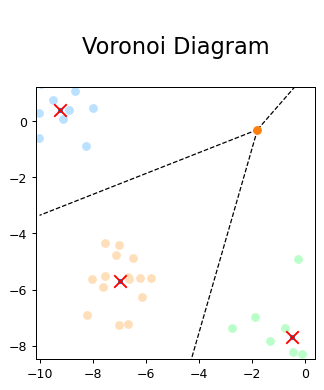

In [61]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_title('\nVoronoi Diagram\n', fontsize=18)

vor = Voronoi(model.centroids)
voronoi_fig = voronoi_plot_2d(vor, ax=ax)

y_clustered = model.predict(X_train)
colours = ['#ffdfba', '#baffc9', '#bae1ff'] # orange, green, blue

# Plot examples
for i, point in enumerate(X_train):
    ax.scatter(point[0], point[1], c=colours[y_clustered[i]])

# Plot centroids
for i in range(len(model.centroids)):
    ax.scatter(model.centroids[i][0], model.centroids[i][1], c='red', marker='x', s=100, zorder=100)

### 3.2 - Choosing k using Elbow Diagrams

The best value for $k$ is not always apparent, and so it is useful to find a system way of selecting a value to investigate. This can be done by choosing a range of values for $k$ and using a small subset of the data. The inertia can be found for each model, and plot on a graph alongside the value of $k$ used. This creates an **elbow diagram**. Once an optimum value of $k$ has been used, the inertia in the model will drop significantly, producing a curve similar to the shape of an arm bent at the elbow joint. The optimum value for $k$ is given by the trade-off for low value of inertia, and low number of clusters. In the arm analogy, this corresponds to the *elbow* point of the line. In this example, it is clear to see that $k=3$ gives a relatively low value for inertia, whilst maintaining a low number of clusters.

Text(0, 0.5, '\nInertia\n')

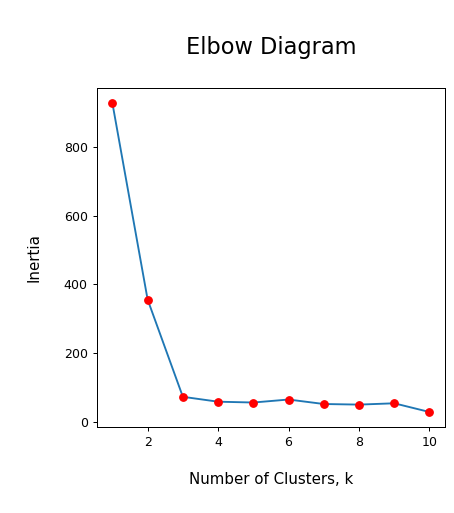

In [50]:
inertias = []

for k in range(1,11):
    model = KMeansClustering(k)
    model.fit(X_train)
    inertias.append(model.inertia)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,11), inertias)
ax.scatter(range(1,11), inertias, c='red', zorder=5)
ax.set_title('\nElbow Diagram\n', fontsize=18)
ax.set_xlabel('\nNumber of Clusters, k\n', fontsize=12)
ax.set_ylabel('\nInertia\n', fontsize=12)

<h2 align="center">Section 4 - SciKit Learn Implementation</h2>

### 4.1 - Comparison with SciKit Learn's `KMeans` Class

The implementation presented in this notebook was intentionally written to be functionally similar to the SciKit Learn `KMeans` class [5]. That is, both are object-oriented approaches, with `fit` and `predict` methods. Additionally, the SciKit Learn implementation also includes the k-Means++ improvement, which can be activated by passing `init='k-means++'` when instantiating the object. The comparison below shows both implementations giving the same predictions for the testing data.

In [163]:
# Notebook implementation
notebook_model = KMeansClustering(k=3)
notebook_model.fit(X_train)
y_notebook = notebook_model.predict(X_test)


# SciKit Learn implementation
from sklearn.cluster import KMeans

sklearn_model = KMeans(3, init='k-means++')
sklearn_model.fit(X_train)
y_sklearn = list(sklearn_model.predict(X_test))


# Compare results
print(f'Notebook implementation predictions:     {y_notebook}')
print(f'SciKit Learn implementation predictions: {y_sklearn}')

Completed in 2 iterations.
Notebook implementation predictions:     [2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2]
SciKit Learn implementation predictions: [2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2]


<h2 align="center">Section 5 - Conclusion</h2>

k-Means is an efficient approach to solving clustering problems. The k-Means++ improvement can be used to initialise centroids more effectively, and alleviate the issues with non-optimal clustering and empty clusters which are found in the traditional method. These algorithms can be applied to problems such as social network analysis, market segmentation and recommender systems.

<h2 align="center">Section 6 - Glossary</h2>

**Centroids**
> The center of a cluster of similar point, whose coordinates are equal to the mean of the points in the cluster/

**Chebyshev distance**
> Also know as the $L_\infty$ metric, this is given by the maximum difference between coordinates in a single dimension for 2 multi-dimensional points (or simply the difference between 2 one-dimensional points).

**Clustering Analysis**
> The process of grouping similar data points together into clusters.

**Clusters**
> A group of similar points.

**Euclidean Distance**
> Also know as the $L_2$ metric, this is given by the sum of the squared differences each dimension of two $d$-dimensional points, all square rooted.

**Greedy**
> An algorithm which pursues the locally optimum choice at each stage.

**Hard Clustering** 
> Clustering analysis that associates each data point with a single cluster.

**Inertia**
> The sum of the squared differences between each data point and its centroid, this gives a measure of the fitness of the centroids produced by a clustering algorithm. Inertia is not a bounded measure, taking values between 0 and $\infty$, but relatively lower values of inertia correspond to better cluster placement.

**Isotropic**
> A cluster whose variance is equal in all directions.

**Manhattan Distance**
>  Also know as the $L_1$ metric, this is given by the sum of the absolute differences each dimension of two $d$-dimensional points.

**Minkowski Distance**
> A general formula for calculating different distance metrics between points.

**Non-Deterministic**
> An algorithm with an element of randomness, this results in the solutions being slightly (or not-so-slightly) different each time.

**Objective Function**
> The error function to minimise in an optimisation problem.

**Soft Clustering** 
> Clustering analysis that can associate each data point with multiple clusters.

**Variability**
> The sum of squared differences between a single centroid and the points associated with it. The sum of the variability of each cluster gives the inertia.

**Voronoi Diagram**
> A visual representation of the partition of the input space in a clustering problem.

**Within-Cluster-Sum-of-Squares**
> See *inertia*.

<h2 align="center">Section 7 - Further Reading</h2>

[1] K Means Clustering Inertia [CodeAcademy](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

[2] 12. Clustering by John Guttag [YouTube - MIT OpenCourseWare](https://www.youtube.com/watch?v=esmzYhuFnds)

[3] Stopping Criterion [Towards Data Science](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)

[4] k-Means++ Improvement [Stanford](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

[5] SciKit Learn Documentation [SKLearn](https://scikit-learn.org/stable/modules/clustering.html)